In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [39]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2) #make_blobs used for creating synthetic data
#Since centers=3, the resulting labels will be 0, 1, and 2. However, since we are tackling an unsupervised machine learning problem, we won't be using these labels.
#Instead, we'll focus on the data in X, which contains the features (1 and 2) and here we are going to cluster this data(X)

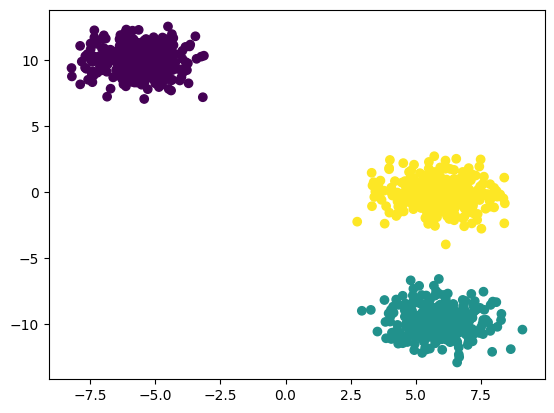

In [40]:
plt.scatter(X[:,0],X[:,1],c=y) #here we can see 3 clusters.we need to find the 3 clusters(no:of clusters) with help of k-means

In [41]:
#standardisation -feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #it makes the data have a mean of 0 and a standard deviation of 1)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [42]:
X_train_scaled=scaler.fit_transform(X_train) #each feature now has a mean of 0 and a standard deviation of 1.
X_test_scaled=scaler.transform(X_test)#to prevent data leakage

In [48]:
#elbow method to select k value
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++") #k-means++ initialization method,better clustering results compared to random initialization.
  kmeans.fit(X_train_scaled) #fitting the model to the data and assigning each data point to a cluster.
  wcss.append(kmeans.inertia_) #kmeans.inertia_ This attribute gives the WCSS, which is the sum of squared distances between each data point and the centroid


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [49]:
wcss

[1340.000000000001,
 451.80929611440143,
 32.83311557041717,
 28.338396624765647,
 24.02467943557795,
 19.843444305706605,
 17.686843584419936,
 15.758153381984798,
 14.36390438612507,
 13.0875620156788]

The goal of K-means is to minimize WCSS by placing centroids optimally.


<function matplotlib.pyplot.show(close=None, block=None)>

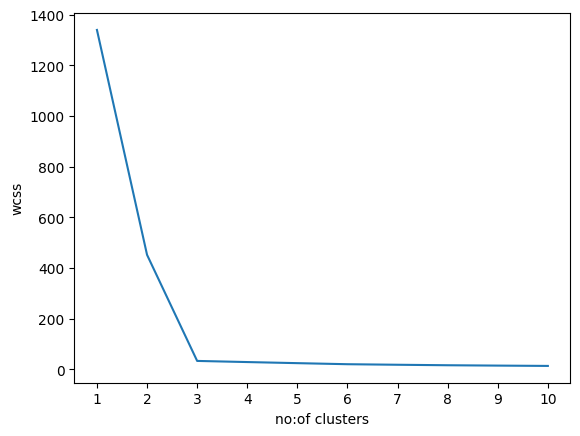

In [50]:
#plot elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("no:of clusters")
plt.ylabel("wcss")
plt.show

here abrupt point is @ 3 .so we can confirm k=3

In [51]:
kmeans=KMeans(n_clusters=3,init="k-means++") #replaced k with 3
kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1,
       0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 2,
       1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0,
       2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1,
       0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2,
       0, 1, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2,
       2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1,

In [52]:
y_pred=kmeans.predict(X_test_scaled)
y_pred

array([2, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2,
       1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2,
       2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0,
       0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2,
       1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,

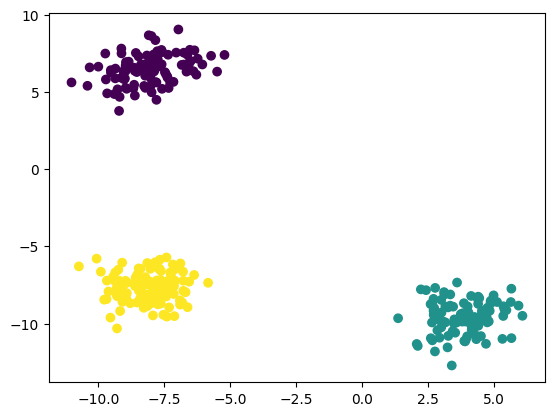

In [53]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
#validating k value
#1.kneelocator 2.silhoutee score


In [54]:
#kneelocator
!pip install kneed

In [24]:
from kneed import knee_locator
kl=knee_locator.KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow #Gives  the best k to use based on the curve's shape

3

Silhouette Coefficient is a measure of how similar a point is to its own cluster (cohesion) compared to other clusters (separation). It provides an overall score for the quality of the clustering

In [25]:
#silhoutee scoring
from sklearn.metrics import silhouette_score
Silhouette_coef=[]
for k in range(2,11): #The Silhouette Coefficient isn't meaningful for k=1 (a single cluster), hence the loop starts from 2.
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  score=silhouette_score(X_train_scaled,kmeans.labels_)
  Silhouette_coef.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [26]:
Silhouette_coef

[0.6669349766076396,
 0.860515321076768,
 0.6969288030067775,
 0.5217860278389692,
 0.3516638482544593,
 0.35683474409793076,
 0.35378178185724996,
 0.3384671550796147,
 0.3421048750303561]

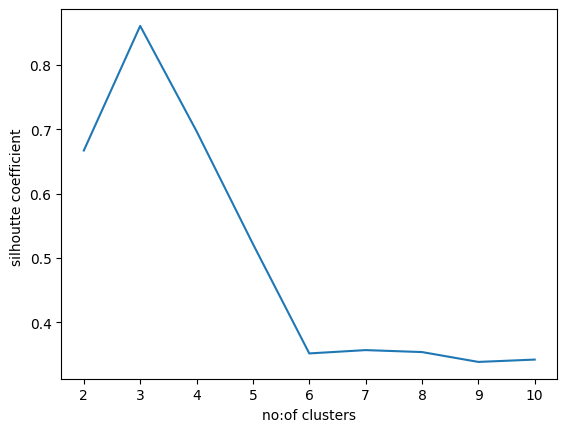

In [27]:
plt.plot(range(2,11),Silhouette_coef)
plt.xticks(range(2,11))
plt.xlabel("no:of clusters")
plt.ylabel("silhoutte coefficient ")
plt.show()

here highest silhouette  score is @ 3 hence k=3
A score close to 1 indicates that the clusters are well-separated and compact.